In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#Required f(x) function and its derivatives
def f(x):
    return math.tan(x)
def f_1st_derivative(x):
     return math.sec(x)**2
def f_2nd_derivative(x):
     return (2*math.tan(x))/(math.cos(x)**2)
def f_3rd_derivative(x):
    return -4*(1/math.cos(x)**2)+6*(1/math.cos(x)**4)

In [0]:
#Function which returns 2nd derivative and O(h) error
def approximate_2nd_derivative(f_3rd_derivative,f,x,h):
    result= (f(x)-(2*f(x+h))+f(x+2*h))/(h**2)
    theoretical_error= abs(f_3rd_derivative(x)*h)
    return result,theoretical_error

In [0]:
#Function which returns absolute values of  actual and theoretical error for given x and h values
def error(f,f_2nd_derivative,f_3rd_derivative,x,h):
    result = approximate_2nd_derivative(f_3rd_derivative,f,x,h) #Call derivative function
    approximate_result = result[0] #Takes approximate result part
    theoretical_error =  result[1] #Takes theoretical error part
    actual_result = f_2nd_derivative(x) #Calls actual derivative function
    actual_error = abs(actual_result-approximate_result) #Error between real and theoretical results
    return actual_error,theoretical_error

In [0]:
def Error_Graph(f,f_2nd_derivative,f_3rd_derivative,x):
    theoretical=[] #list for keeping theoretical errors
    actual=[] #list for keeping actual errors
    h_array=[] #list for keeping h values 
    #Fills h array with negative powers of 10 up to -10th power
    for k in range(1,11):
        h1 = math.pow(10,-k)
        h_array.append(h1)
    #For every h value it calculates actual and theoretical error
    for h in h_array:
        actual_error, theoretical_error =error(f,f_2nd_derivative,f_3rd_derivative,x,h)
        #Adds absolute difference of errors to difference list
        theoretical.append(theoretical_error)
        actual.append(actual_error)


    #Graph for actual and theoretical error observation   
    plt.figure()
    plt.xlabel("h")
    plt.loglog( h_array,theoretical,"--", label="Theoretical Error")
    plt.loglog( h_array,actual,"--", label="Actual Error")
    plt.legend()

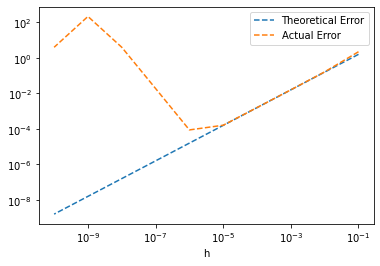

In [28]:
Error_Graph(f,f_2nd_derivative,f_3rd_derivative,math.pi/4)

In [0]:
#Function returns approxiamate second derivate for given x values  
#h values are negative powers of 10 up to -10th power
def print_2nd_derivative(f_3rd_derivative,f,x):
    for k in range(1,11):
            h = math.pow(10,-k)#Calculates h
            #Calls derivative function
            print('h=',h,'result=', approximate_2nd_derivative(f_3rd_derivative,f,x,h)[0]) 

In [30]:
print_2nd_derivative(f_3rd_derivative,f,math.pi/4)

h= 0.1 result= 6.239988622166991
h= 0.01 result= 4.164798117778368
h= 0.001 result= 4.016046794896866
h= 0.0001 result= 4.001600495406876
h= 1e-05 result= 4.000162423523078
h= 1e-06 result= 3.999911513119514
h= 1e-07 result= 4.019007349143068
h= 1e-08 result= 0.0
h= 1e-09 result= 222.04460492503128
h= 1e-10 result= 0.0


In [0]:
def Condition_graph(f_3rd_derivative,f,x):
    results=[] #list for keeping the results
    add_array=[]#list for keeping x values
    add = 0.0001 #Step size
    add_array.append(x)
    for k in range(1,11): 
        #Fills list with x values with adding-subtracting small values
        add_array.append(x+add)
        add_array.append(x-add)
        add +=0.0001
    #Sorts array for better graph
    add_array.sort()
    
    h=0.001 #Constant h value
    for i in add_array:
        #For every value, it calculates second derivative
        result = approximate_2nd_derivative(f_3rd_derivative,f,i,h) #Call derivative function
        approximate_result = result[0] #Takes approximate result part
        results.append(approximate_result)#Adds to results array

    #It transfroms x values in terms of pi
    for i in range(len(add_array)):
         add_array[i] /= math.pi
    
    #Figure for short step sizes
    plt.figure()
    plt.xlabel("x (unit of pi)")
    plt.plot( add_array,results,".", label="f''(x)")
    plt.legend()
    
    #Figure for wider perspective
    plt.figure()
    f_app = np.vectorize(approximate_2nd_derivative)
    x1 = np.linspace(math.pi/6, math.pi/3)
    plt.xlabel("x (unit of pi)")
    plt.plot(x1/math.pi,f_app(f_3rd_derivative,f,x1,h)[0], label="f''(x)")
    plt.legend()

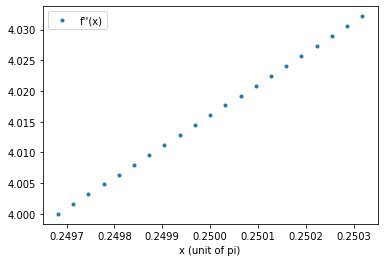

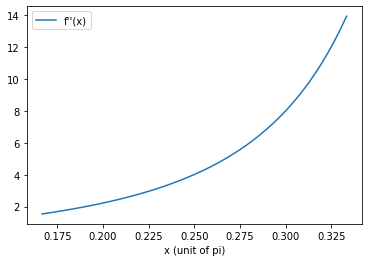

In [32]:
Condition_graph(f_3rd_derivative,f,math.pi/4)